<a href="https://colab.research.google.com/github/housemLassoued/ML-deployment/blob/main/Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('/content/Twitter_Sentiment_Analysis.csv')

In [ ]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df['label'].value_counts()

,count
label,
0,29720
1,2242


In [ ]:
from sklearn.utils import resample
df_majority=df[df['label']==0]
df_minority=df[df['label']==1]
df_minority_upsampled=resample(df_minority,replace=True,n_samples=len(df_majority),random_state=123)
df_upsampled=pd.concat([df_majority,df_minority_upsampled])
df_upsampled['label'].value_counts()

,count
label,
0,29720
1,29720


In [ ]:
# Apply islower() to each element in the Series
df_upsampled['tweet'].apply(lambda x: x.islower()).value_counts()

,count
tweet,
True,58947
False,493


In [ ]:
df_upsampled['tweet']=df_upsampled['tweet'].str.lower()


In [ ]:
import re
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt
    # Apply the function to the 'text' column
df_upsampled['tweet'] = df_upsampled['tweet'].apply(lambda x: remove_pattern(x, "@[\w]*"))

In [ ]:

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub('', text)
    # Apply the function to the 'text' column
df_upsampled['tweet'] = df_upsampled['tweet'].apply(remove_urls)

In [ ]:
df_upsampled['tweet'].iloc[3]

'#model   i love u take with u all the time in urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91\x85ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦  '

In [ ]:
def clean_text(text):

    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text
    # Apply the function to the 'text' column
df_upsampled['tweet'] = df_upsampled['tweet'].apply(clean_text)

In [ ]:
df_upsampled['tweet'].iloc[3]

'model   i love u take with u all the time in urð ðððð\x85ððð  '

In [ ]:
df_upsampled['tweet']=df_upsampled['tweet'].str.strip()
df_upsampled.head()

,label,tweet
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for lyft credit i cant use cause they d...
2,0,bihday your majesty
3,0,model i love u take with u all the time in u...
4,0,factsguide society now motivation


In [ ]:
df_upsampled['tweet'].iloc[3]

'model   i love u take with u all the time in urð ðððð\x85ððð'

In [ ]:
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

# Apply the function to the 'text' column
df_upsampled['tweet'] = df_upsampled['tweet'].apply(remove_punctuations)

In [ ]:
df_upsampled['tweet'].iloc[3]

'model   i love u take with u all the time in urð ðððð\x85ððð'

In [ ]:
def remove_ð(text):
    text = text.replace('ð', '')
    return text
    # Apply the function to the 'text' column
df_upsampled['tweet'] = df_upsampled['tweet'].apply(remove_ð)

In [ ]:
df_upsampled['tweet'].iloc[3]

'model   i love u take with u all the time in ur \x85'

In [ ]:
def remove_numbers(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text
    # Apply the function to the 'text' column
df_upsampled['tweet'] = df_upsampled['tweet'].apply(remove_numbers)

In [ ]:
df_upsampled['tweet'].iloc[3]

'model   i love u take with u all the time in ur \x85'

In [ ]:
def remove(text):
    text = re.sub(r'\s+', ' ', text)
    return text
    # Apply the function to the 'text' column
df_upsampled['tweet'] = df_upsampled['tweet'].apply(remove)

In [ ]:
df_upsampled['tweet'].iloc[3]

'model i love u take with u all the time in ur '

In [ ]:
def remove_extra_spaces(text):
    text = ' '.join(text.split())
    return text
    # Apply the function to the 'text' column
df_upsampled['tweet'] = df_upsampled['tweet'].apply(remove_extra_spaces)

In [ ]:
df_upsampled['tweet'].iloc[3]

'model i love u take with u all the time in ur'

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)
# Apply the function to the 'text' column
df_upsampled['tweet'] = df_upsampled['tweet'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
df_upsampled['tweet'].iloc[3]

'model love u take u time ur'

In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()
def lemmatize_text(text):
    words=word_tokenize(text)
    lemmatized_words=[lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)
    # Apply the function to the 'text' column
df_upsampled['tweet'] = df_upsampled['tweet'].apply(lemmatize_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Séparer les tweets en positifs et négatifs
negative_tweets = df_upsampled[df_upsampled['label'] == 1]['tweet']
positive_tweets = df_upsampled[df_upsampled['label'] == 0]['tweet']


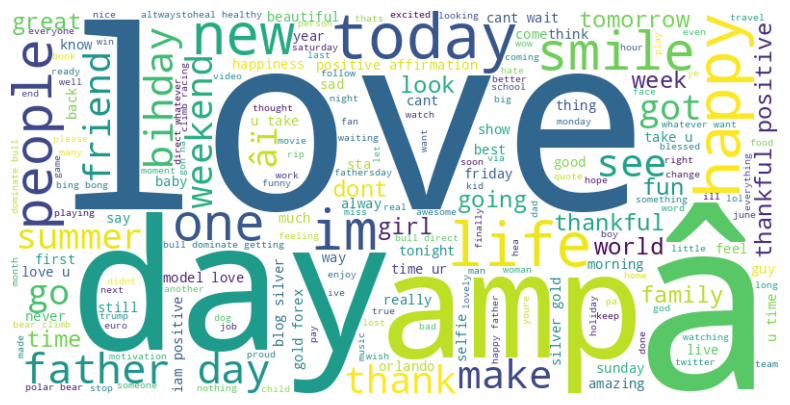

In [ ]:
from wordcloud import WordCloud

# Filter for tweets where label is 1 and then join
text = ' '.join(positive_tweets)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

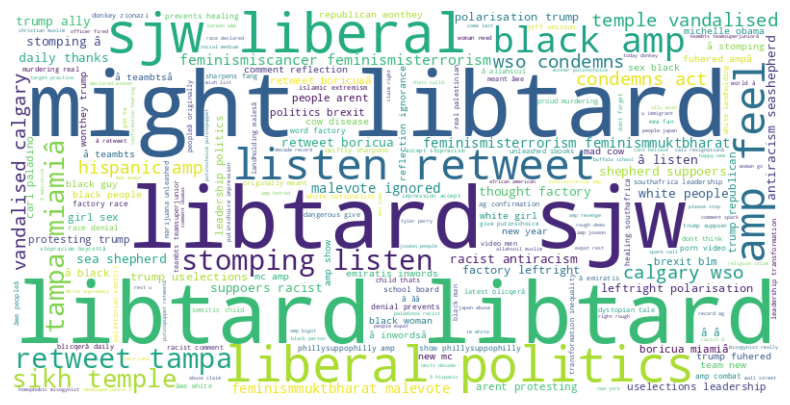

In [ ]:
from wordcloud import WordCloud

# Filter for tweets where label is 1 and then join
text = ' '.join(negative_tweets)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from collections import Counter


positive_words = Counter([word for tweet in positive_tweets for word in tweet.split()])
negative_words = Counter([word for tweet in negative_tweets for word in tweet.split()])

most_common_positive = positive_words.most_common(10)
most_common_negative = negative_words.most_common(10)

print("Most common words in positive tweets:")
print(positive_words)

print("\nMost common words in negative tweets:")
print(negative_words)


Most common words in positive tweets:
Counter({'day': 2758, 'love': 2684, 'â': 1806, 'happy': 1661, 'u': 1572, 'amp': 1324, 'time': 1199, 'life': 1179, 'im': 1097, 'today': 1057, 'get': 947, 'like': 938, 'positive': 926, 'thankful': 920, 'new': 914, 'father': 897, 'bihday': 836, 'good': 813, 'make': 804, 'one': 786, 'people': 784, 'smile': 774, 'cant': 766, 'see': 736, 'go': 706, 'friend': 699, 'want': 669, 'take': 654, 'dont': 652, 'work': 627, 'weekend': 602, 'healthy': 596, 'week': 586, 'family': 573, 'need': 562, 'got': 560, 'fun': 559, 'summer': 553, 'girl': 541, 'way': 538, 'friday': 520, 'bull': 506, 'best': 506, 'beautiful': 501, 'year': 490, 'great': 481, 'going': 471, 'first': 459, 'morning': 458, 'wait': 456, 'thing': 455, 'really': 450, 'ur': 446, 'music': 445, 'know': 441, 'tomorrow': 438, 'âï': 432, 'home': 429, 'fathersday': 425, 'affirmation': 423, 'back': 418, 'world': 416, 'dad': 416, 'come': 409, 'cute': 409, 'orlando': 408, 'sad': 404, 'look': 403, 'think': 390, 'fe

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_upsampled['tweet'])
y = df_upsampled['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      5880
           1       0.98      1.00      0.99      6008

    accuracy                           0.99     11888
   macro avg       0.99      0.99      0.99     11888
weighted avg       0.99      0.99      0.99     11888



In [ ]:
from sklearn.metrics import confusion_matrix
import plotly.express as px
cm = confusion_matrix(y_test, y_pred)


cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])


fig = px.imshow(cm_df,
                 color_continuous_scale='Viridis',
                 labels={'x':'Predicted Label', 'y':'Actual Label', 'color':'Count'},
                 title='Matrice de Confusion')

fig.show()


In [ ]:

from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred=xgb.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5880
           1       0.95      0.87      0.91      6008

    accuracy                           0.91     11888
   macro avg       0.91      0.91      0.91     11888
weighted avg       0.91      0.91      0.91     11888



In [ ]:
from sklearn.metrics import confusion_matrix
import plotly.express as px
cm = confusion_matrix(y_test, y_pred)


cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])


fig = px.imshow(cm_df,
                 color_continuous_scale='Viridis',
                 labels={'x':'Predicted Label', 'y':'Actual Label', 'color':'Count'},
                 title='Matrice de Confusion')

fig.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5880
           1       0.97      0.99      0.98      6008

    accuracy                           0.98     11888
   macro avg       0.98      0.98      0.98     11888
weighted avg       0.98      0.98      0.98     11888



In [ ]:
from sklearn.metrics import confusion_matrix
import plotly.express as px
cm = confusion_matrix(y_test, y_pred)


cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])


fig = px.imshow(cm_df,
                 color_continuous_scale='Viridis',
                 labels={'x':'Predicted Label', 'y':'Actual Label', 'color':'Count'},
                 title='Matrice de Confusion')

fig.show()

In [ ]:

def clean_tweet(tweet):
    tweet = tweet.lower()  # Convert to lowercase
    tweet = remove_pattern(tweet, "@[\w]*")  # Remove mentions
    tweet = remove_urls(tweet)  # Remove URLs
    tweet = clean_text(tweet)
    tweet = remove_ð(tweet)
    tweet = remove_numbers(tweet)
    tweet = remove(tweet)
    tweet = remove_extra_spaces(tweet)
    tweet = remove_stopwords(tweet)
    tweet = remove_punctuations(tweet)
    tweet = lemmatize_text(tweet)
    return tweet


In [ ]:
!pip install ipywidgets


In [ ]:
def classify_tweet(b):
    with output:
        output.clear_output()
        tweet = tweet_input.value
        tweet = clean_tweet(tweet)
        tweet = vectorizer.transform([tweet])
        prediction = rf.predict(tweet)[0]  # Removed extra brackets here

        # Show the result
        if prediction == 1:
            print("The tweet is classified as: Racist/Sexist")
        else:
            print("The tweet is classified as: Not Racist/Sexist")


In [ ]:

import ipywidgets as widgets

# Create a button widget
button = widgets.Button(description="Classify Tweet")

# Create an output widget to display results
output = widgets.Output()

# Text input widget
tweet_input = widgets.Text(
    value='',
    placeholder='Enter your tweet here',
    description='Tweet:',
    disabled=False
)

# Attach the function to the button
button.on_click(classify_tweet)

# Display the button and output
display(tweet_input, button, output)

Text(value='', description='Tweet:', placeholder='Enter your tweet here')

Button(description='Classify Tweet', style=ButtonStyle())

Output()